In [5]:
!pip install yfinance pandas numpy matplotlib seaborn plotly scikit-learn statsmodels prophet tensorflow


C:\Users\Admin\AppData\Local\Temp\ipykernel_4592\2658310962.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.261042  24.729265  23.821666  24.718169  212818400
2015-01-05  23.577572  24.110148  23.391171  24.030261  257142000
2015-01-06  23.579792  23.839422  23.218083  23.641926  263188400
2015-01-07  23.910433  24.010290  23.677430  23.788384  160423600
2015-01-08  24.829126  24.886823  24.121244  24.238856  237458000


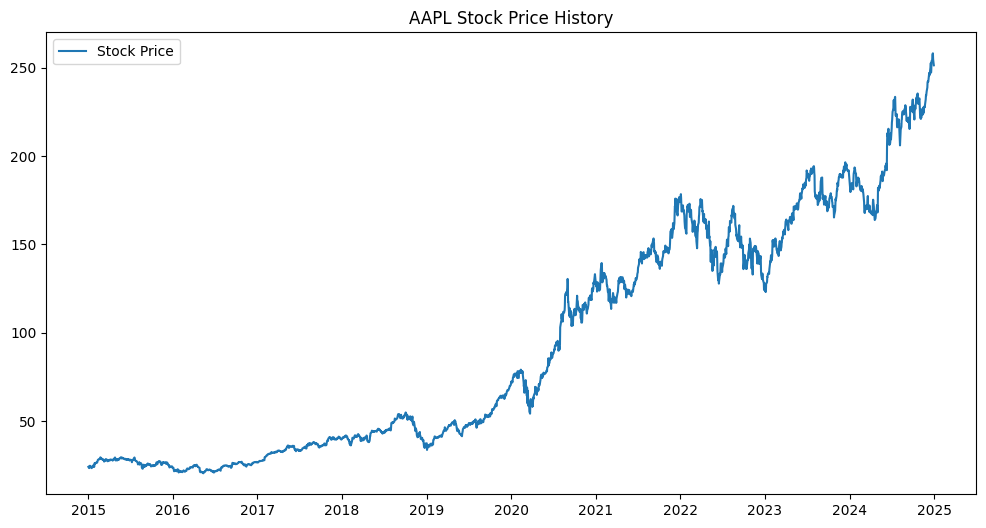

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_m

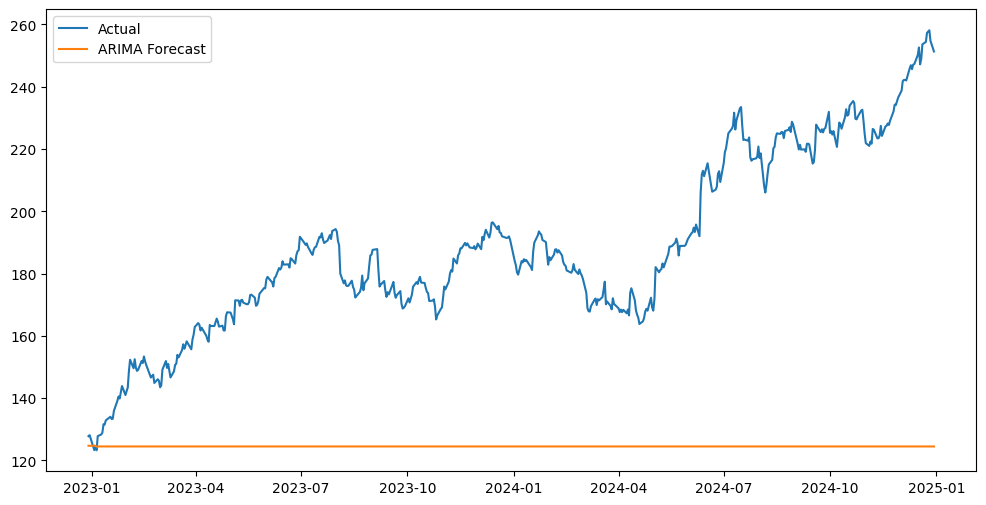

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: 

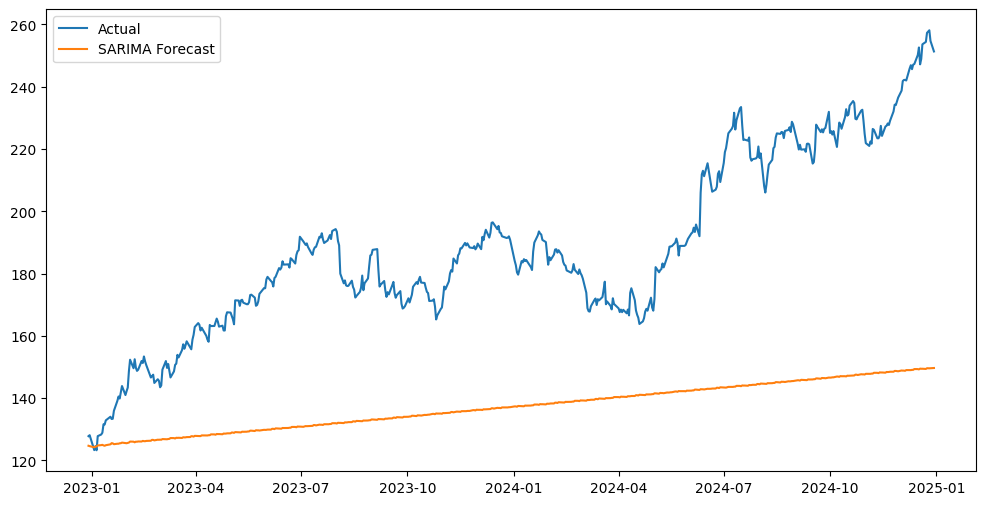

19:46:51 - cmdstanpy - INFO - Chain [1] start processing
19:46:53 - cmdstanpy - INFO - Chain [1] done processing


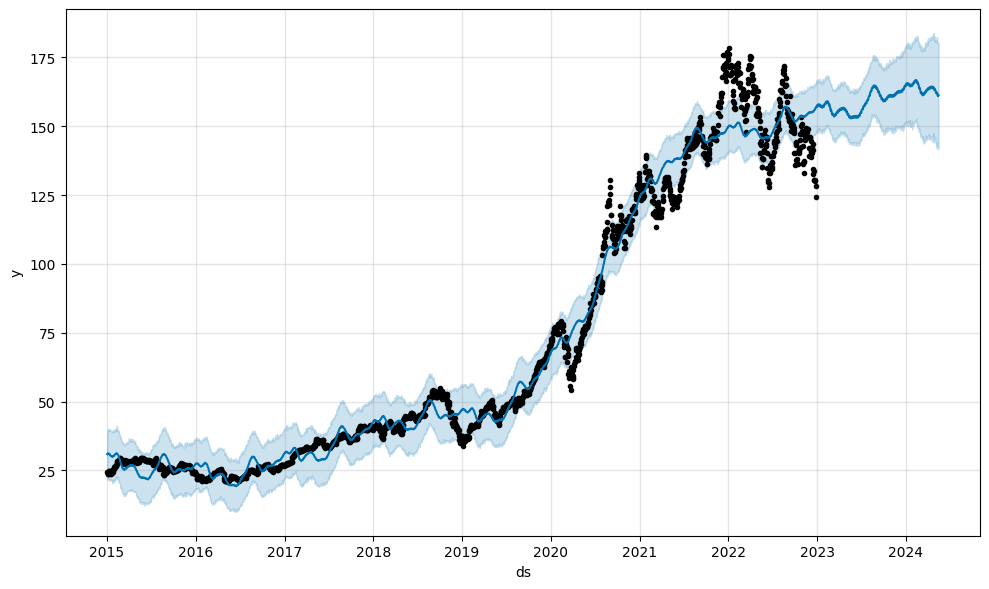

C:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0061
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.9587e-04
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.9533e-04
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.6970e-04
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.6866e-04
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.4758e-04
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.3276e-04
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.4268e-04
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 2.0996e-04
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 2.1350e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step 


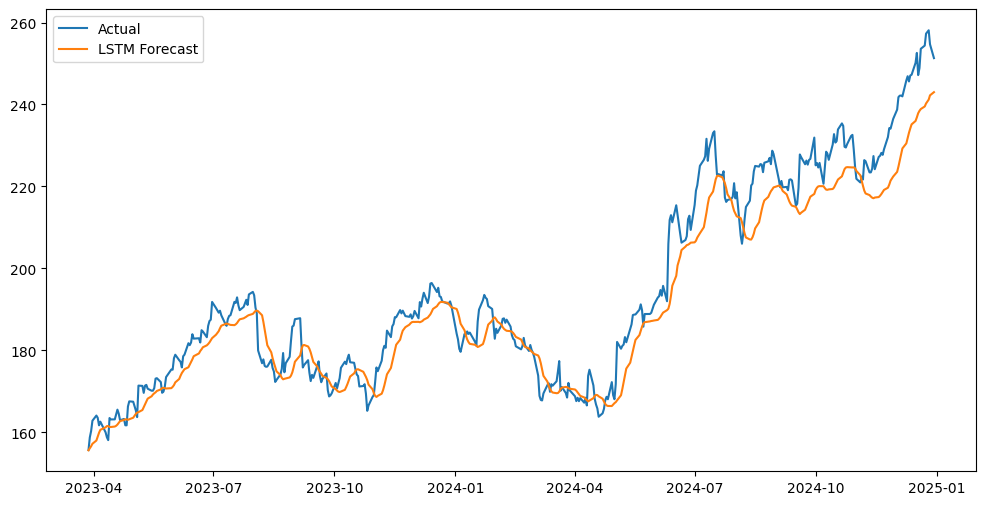

ARIMA → RMSE: 69.54, MAE: 63.57
SARIMA → RMSE: 55.49, MAE: 50.89
Prophet → RMSE: 38.29, MAE: 31.37
LSTM → RMSE: 6.95, MAE: 5.41


In [7]:
# ------------------------------
# 📌 Stock Market Time Series Forecasting Project
# ------------------------------

# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# ------------------------------
# 2. Load Dataset (using Yahoo Finance)
# ------------------------------
ticker = "AAPL"   # You can change to any stock symbol (e.g., 'TSLA', 'MSFT')
df = yf.download(ticker, start="2015-01-01", end="2024-12-31")

print(df.head())

# ------------------------------
# 3. Data Preprocessing
# ------------------------------
df = df[['Close']]   # Focus only on Closing price
df = df.dropna()

# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# ------------------------------
# 4. Visualization
# ------------------------------
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Stock Price")
plt.title(f"{ticker} Stock Price History")
plt.legend()
plt.show()

# ------------------------------
# 5. ARIMA Model
# ------------------------------
arima_model = ARIMA(train, order=(5,1,0))  # p,d,q values can be tuned
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(test.index, test['Close'], label="Actual")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast")
plt.legend()
plt.show()

# ------------------------------
# 6. SARIMA Model
# ------------------------------
sarima_model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(test.index, test['Close'], label="Actual")
plt.plot(test.index, sarima_forecast, label="SARIMA Forecast")
plt.legend()
plt.show()

# ------------------------------
# 7. Prophet Model
# ------------------------------
prophet_df = df.reset_index()[['Date','Close']]
prophet_df.columns = ['ds','y']

prophet_train = prophet_df.iloc[:train_size]
prophet_test = prophet_df.iloc[train_size:]

prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(prophet_train)

future = prophet_model.make_future_dataframe(periods=len(prophet_test))
forecast = prophet_model.predict(future)

prophet_model.plot(forecast)
plt.show()

# ------------------------------
# 8. LSTM Model
# ------------------------------
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Build LSTM
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length,1)),
    LSTM(50),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions
lstm_pred = lstm_model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)
actual_prices = scaler.inverse_transform(y_test.reshape(-1,1))

# Plot LSTM results
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size+seq_length:], actual_prices, label="Actual")
plt.plot(df.index[train_size+seq_length:], lstm_pred, label="LSTM Forecast")
plt.legend()
plt.show()

# ------------------------------
# 9. Model Evaluation
# ------------------------------
def evaluate(y_true, y_pred, name="Model"):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")

evaluate(test['Close'], arima_forecast, "ARIMA")
evaluate(test['Close'], sarima_forecast, "SARIMA")
evaluate(prophet_test['y'], forecast['yhat'].iloc[-len(prophet_test):], "Prophet")
evaluate(actual_prices, lstm_pred, "LSTM")
